## Diabetes Prediction Using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"E:\Diabetes Prediction\Files\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Text(0.5, 1.0, 'Checking for Missing Values')

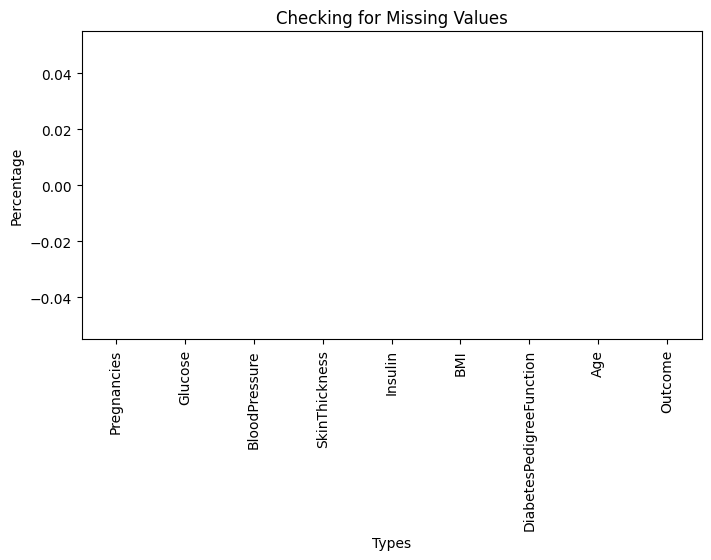

In [7]:
df.isnull().sum().plot(kind="bar", figsize=(8,4))
plt.xlabel("Types")
plt.ylabel("Percentage")
plt.title("Checking for Missing Values")

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Handling Missing values

In [10]:
# Columns where 0 is not a valid value
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Check how many zero values are present
(df[cols_with_zero] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [11]:
# Replacing Invalid Zeros with NaN
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

Text(0.5, 1.0, 'Checking for Missing Values')

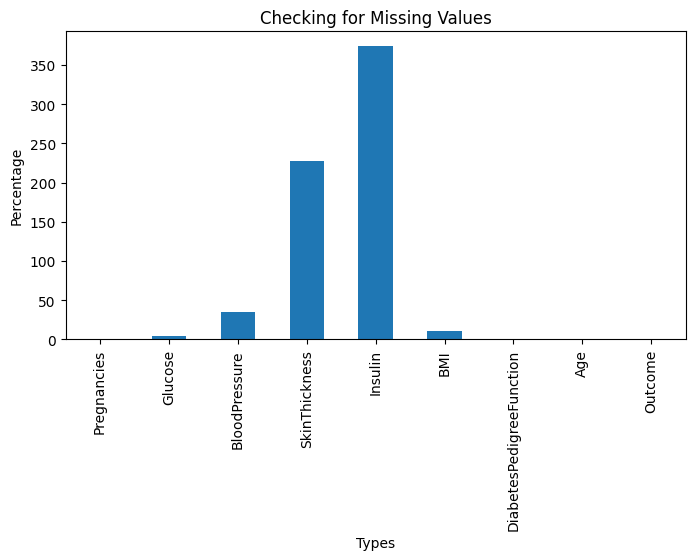

In [12]:
df.isnull().sum().plot(kind="bar", figsize=(8,4))
plt.xlabel("Types")
plt.ylabel("Percentage")
plt.title("Checking for Missing Values")

In [13]:
# Handle Missing Values (Median Imputation)
df.fillna(df.median(), inplace=True)

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Checking for Missing Values')

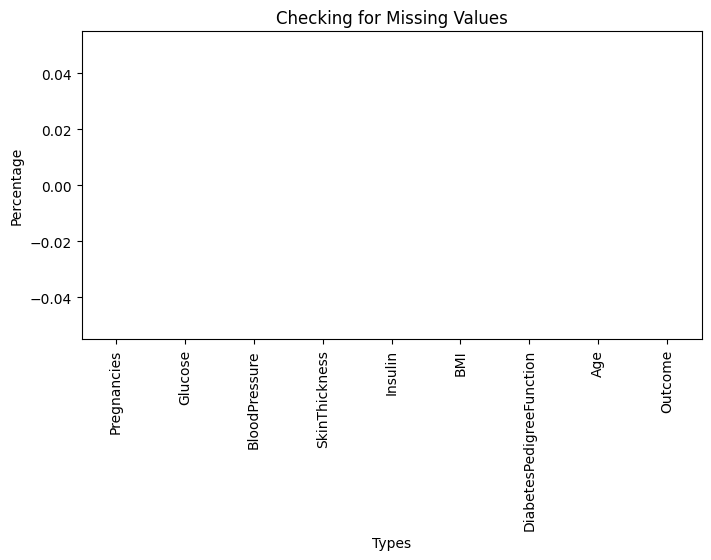

In [15]:
df.isnull().sum().plot(kind="bar", figsize=(8,4))
plt.xlabel("Types")
plt.ylabel("Percentage")
plt.title("Checking for Missing Values")

In [16]:
# Separating Features and Target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train, Test, Valid Phase

In [17]:
# 70% Training, 30% Temporary
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split temp into 20% Test, 10% Validation
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

In [18]:
# Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
X_val   = scaler.transform(X_val)

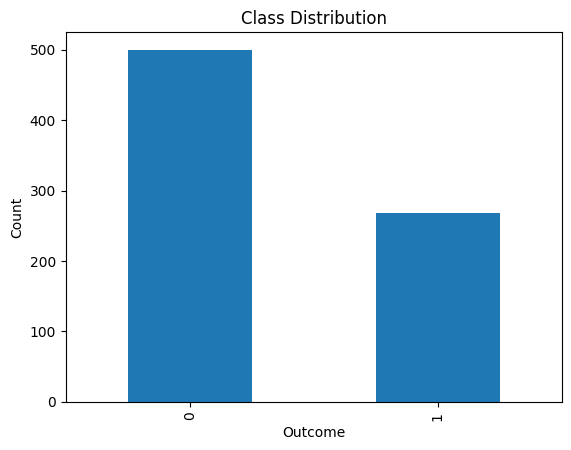

In [19]:
# Class Distribution Check
df['Outcome'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

In [20]:
# ============================
# MODEL 1: Random Forest Classifier
# ============================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf.fit(X_train, y_train)

train_acc = accuracy_score(y_train, rf.predict(X_train))
test_acc  = accuracy_score(y_test, rf.predict(X_test))
val_acc   = accuracy_score(y_val, rf.predict(X_val))

print("Random Forest Accuracy")
print("Train:", train_acc)
print("Test :", test_acc)
print("Val  :", val_acc)
print("\nClassification Report:\n", classification_report(y_test, rf.predict(X_test)))
print("Confusion Matrix: \n", confusion_matrix(y_test, rf.predict(X_test)))



Random Forest Accuracy
Train: 0.957169459962756
Test : 0.7337662337662337
Val  : 0.7402597402597403

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       100
           1       0.64      0.56      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix: 
 [[83 17]
 [24 30]]


In [21]:
# ============================
# MODEL 1: Random Forest Classifier
# ============================

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=30,       # epochs ≈ trees
    max_depth=4,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

train_acc = accuracy_score(y_train, xgb.predict(X_train))
test_acc  = accuracy_score(y_test, xgb.predict(X_test))
val_acc   = accuracy_score(y_val, xgb.predict(X_val))

print("XGBoost Accuracy")
print("Train:", train_acc)
print("Test :", test_acc)
print("Val  :", val_acc)


XGBoost Accuracy
Train: 0.8752327746741154
Test : 0.7662337662337663
Val  : 0.7532467532467533
